In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import cv2
import math
from PIL import Image

In [2]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [6]:
model_path = 'model_files/face_landmarker.task'

In [ ]:
# with open('model_files/blaze_face_short_range.tflite', 'rb') as f:
#     model = f.read()
#     f.close()

In [7]:
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)

In [10]:
with FaceLandmarker.create_from_options(options) as landmarker:
    mp_image = mp.Image.create_from_file('pics/me_bound.jpg')
    face_landmarker_result = landmarker.detect(mp_image)
    # print(face_landmarker_result)

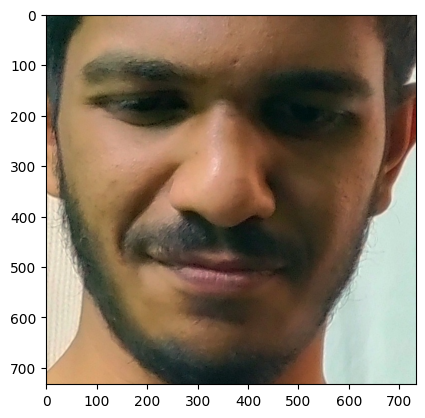

In [11]:
img = cv2.imread('pics/me_bound.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [9]:
boundary = [(10, 338), (338, 297), (297, 332), (332, 284),
                                (284, 251), (251, 389), (389, 356), (356, 454),
                                (454, 323), (323, 361), (361, 288), (288, 397),
                                (397, 365), (365, 379), (379, 378), (378, 400),
                                (400, 377), (377, 152), (152, 148), (148, 176),
                                (176, 149), (149, 150), (150, 136), (136, 172),
                                (172, 58), (58, 132), (132, 93), (93, 234),
                                (234, 127), (127, 162), (162, 21), (21, 54),
                                (54, 103), (103, 67), (67, 109), (109, 10)]

In [10]:
len(boundary)

36

In [21]:
boundary_landmarks = []
for i in boundary:
    boundary_landmarks.append(i[0])
len(boundary_landmarks)

36

In [55]:
%%timeit
temp = [face_landmarker_result.face_landmarks[0][i] for i in boundary_landmarks]

2.28 µs ± 60.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [47]:
img_x, img_y, _ = img.shape

In [59]:
def coord(i):
    return (min(math.floor(i.x * img_y), img_y - 1), min(math.floor(i.y * img_x), img_x - 1))

In [60]:
boundary_coord = [coord(i) for i in temp]

In [64]:
boundary_coord[:5]

[(370, -57), (464, -48), (541, -29), (610, 2), (650, 43)]

In [62]:
for i in range(0, len(boundary_coord)-1):
   from_coordinate = boundary_coord[i]
   to_coordinate = boundary_coord[i+1]
   img = cv2.line(img, from_coordinate, to_coordinate, (255, 255, 0), 1)

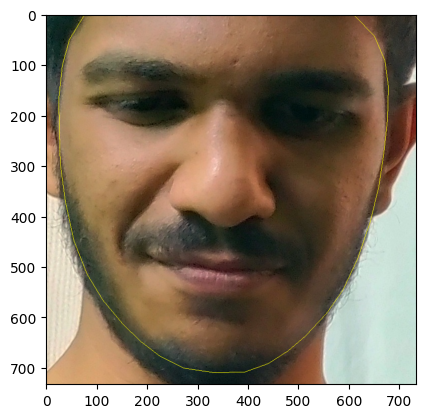

In [63]:
plt.imshow(img)

In [67]:
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(boundary_coord), 1)
mask = mask.astype(bool)

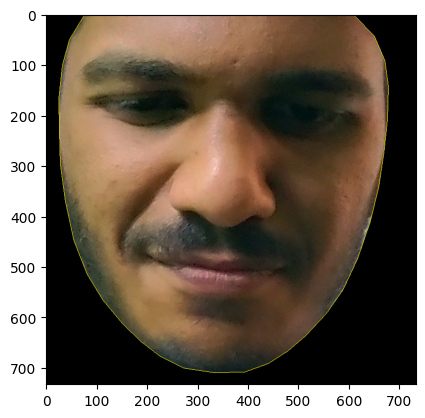

In [68]:
out = np.zeros_like(img)
out[mask] = img[mask]
plt.imshow(out)

In [32]:
# boundary_coord

In [33]:
# x[boundary_landmarks]

In [45]:
# face_landmarker_result.face_landmarks[0]

In [69]:
img.shape

(733, 733, 3)

In [72]:
img_reshape = cv2.resize(out, (160, 160))

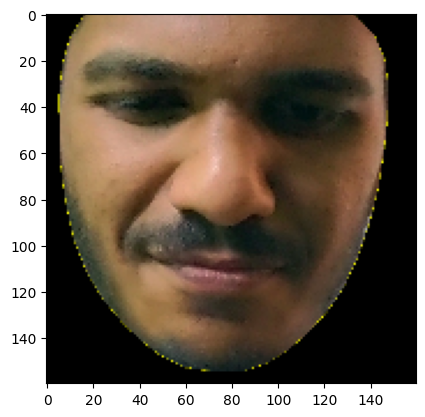

In [73]:
plt.imshow(img_reshape)

In [74]:
img_reshape.shape

(160, 160, 3)